# Genome-Environment-Geographic Association

## Mathew Rees
## 24 April, 2021

### Here I use genetic, ecological and geographical pairwise distance matrices to investigate patterns of diversification in populations of paubrasil.

This notebook was written in Jupyterlab but is intended to be run in R.

In [ ]:
library(psych)    # Used to investigate correlations among predictors
library(vegan)    # Used to run RDA
library(remotes)
library(vcfR)
library(raster)
library(corrplot)
library(PerformanceAnalytics)
library(ade4)
library(ape)
library(geosphere)
library(tidyverse)
library(ggpubr)
library(rcompanion)

Load the data

In [2]:
# first we select only wild samples
samples <- read.csv("RDA.Chesla.csv", header = TRUE, stringsAsFactors = FALSE, row.names = 1)

# we use our previously computed pairwise genetic distance matrix between all individuals following a custom script provided by Isaac Overcast.
genetic.dist <- as.matrix(read.csv("distances.wild.csv", row.names = 1))

# we compute the geographic distance matrix
x <- cbind(samples$Long_DD, samples$Lat_DD)
d.geo <- distm(x, fun = distGeo)
geo.dist<-as.dist(d.geo)
str(geo.dist)

 'dist' num [1:465] 0 821723 821723 821723 0 ...
 - attr(*, "Size")= int 31
 - attr(*, "call")= language as.dist.default(m = d.geo)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


In [3]:
# we format the distance matrix as a distance object
gen.dist <- as.dist(genetic.dist)
str(gen.dist)

 'dist' Named num [1:465] 0.247 0.653 0.652 0.66 0.205 ...
 - attr(*, "Labels")= chr [1:31] "Paubrasilia_echinata_22_7905_13" "Paubrasilia_echinata_23_7905_12" "Paubrasilia_echinata_25_7924_03" "Paubrasilia_echinata_26_7923_02" ...
 - attr(*, "Size")= int 31
 - attr(*, "call")= language as.dist.default(m = genetic.dist)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


In [4]:
# We compute the ecological distance matrix and scale all variables
x <- scale(samples[,c(4:22)]) # scale(samples[,c(5,7,8, 15,18)])
eco.dist <- dist(x)
str(eco.dist)

 'dist' Named num [1:465] 0 4.96 4.96 4.96 0 ...
 - attr(*, "Size")= int 31
 - attr(*, "Labels")= chr [1:31] "Paubrasilia_echinata_22_7905_13" "Paubrasilia_echinata_23_7905_12" "Paubrasilia_echinata_25_7924_03" "Paubrasilia_echinata_26_7923_02" ...
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = x)


Now lets visualize these correlations to see if we have a linear relationships between our co-variants.

plot regression lines of distance matrices: https://jkzorz.github.io/2019/07/09/scatter-plots.html

In [5]:
aa = as.vector(eco.dist)
tt = as.vector(gen.dist)
gg = as.vector(geo.dist)

#new data frame with vectorized distance matrices
mat = data.frame(aa,tt,gg)

Let’s check the relationship between ecological and geographic distance.

`geom_smooth()` using formula 'y ~ x'


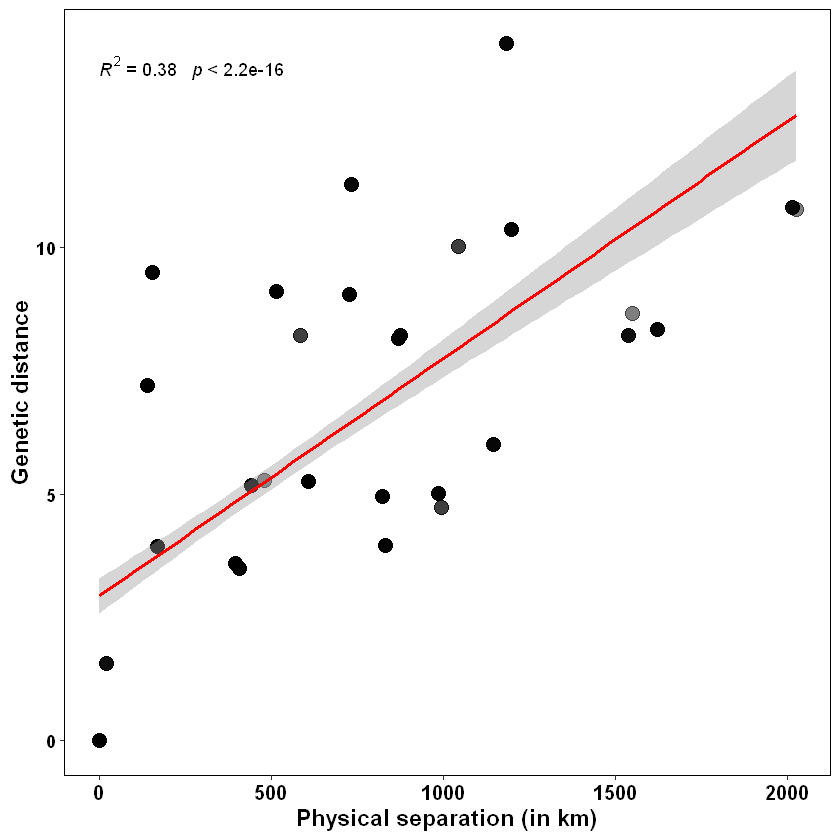

In [6]:
mm = ggplot(mat, aes(y = aa, x = gg/1000)) + 
    geom_point(size = 4, alpha = 0.5) + 
    geom_smooth(method = "lm", colour = "red", alpha = 0.4) +
    stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~~~"))) +
    labs(x = "Physical separation (in km)", y = "Genetic distance") + 
    theme( axis.text.x = element_text(face = "bold",colour = "black", size = 12), 
        axis.text.y = element_text(face = "bold", size = 11, colour = "black"), 
        axis.title= element_text(face = "bold", size = 14, colour = "black"), 
        panel.background = element_blank(), 
        panel.border = element_rect(fill = NA, colour = "black"))
mm

Not quite the best fit but we can see a linear trend here.


Call:
lm(formula = aa ~ gg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9793 -2.4357  0.1283  2.6056  5.8117 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.937e+00  1.822e-01   16.12   <2e-16 ***
gg          4.810e-06  2.886e-07   16.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.628 on 463 degrees of freedom
Multiple R-squared:  0.3751,	Adjusted R-squared:  0.3737 
F-statistic: 277.9 on 1 and 463 DF,  p-value: < 2.2e-16


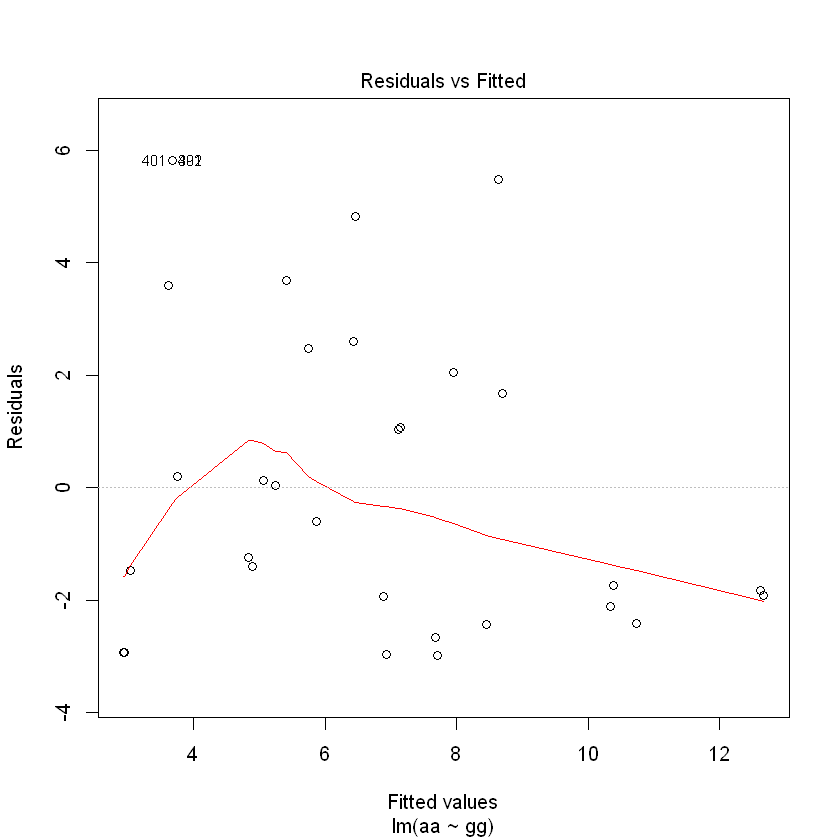

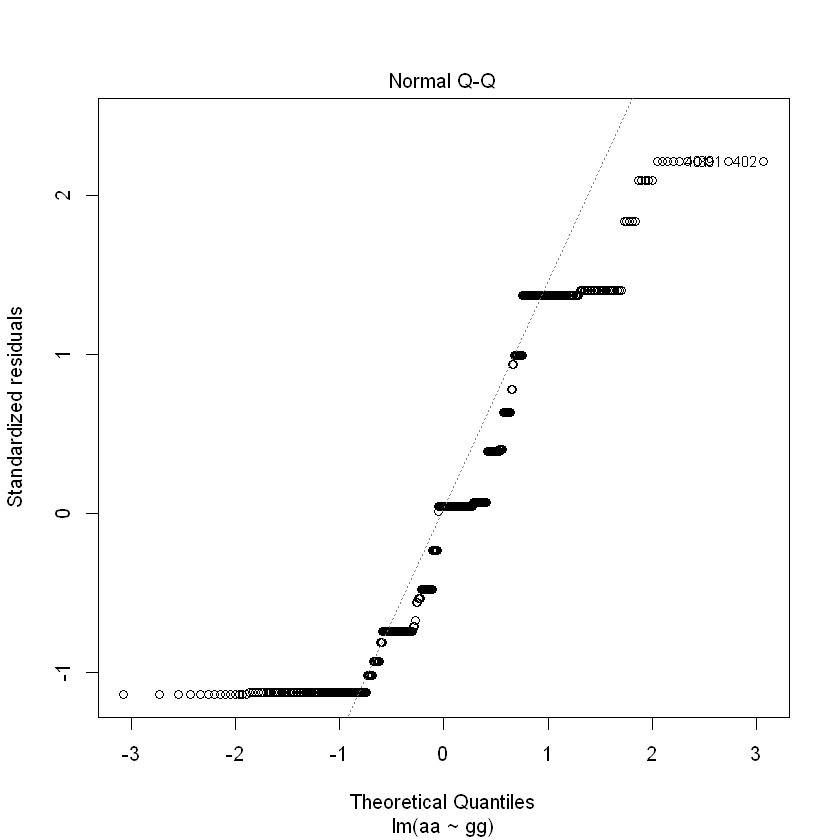

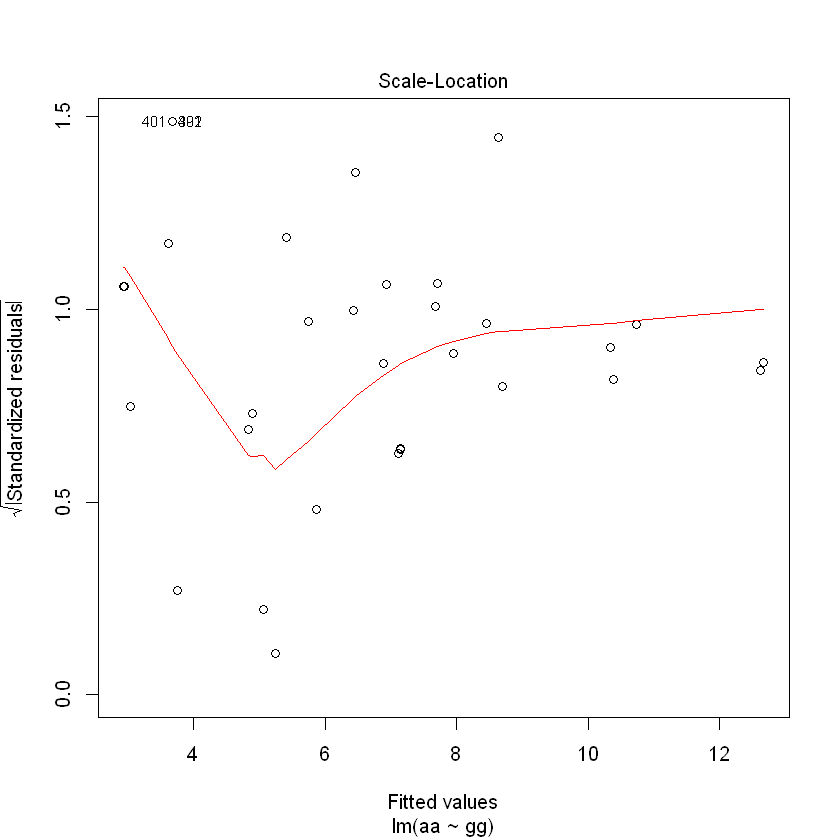

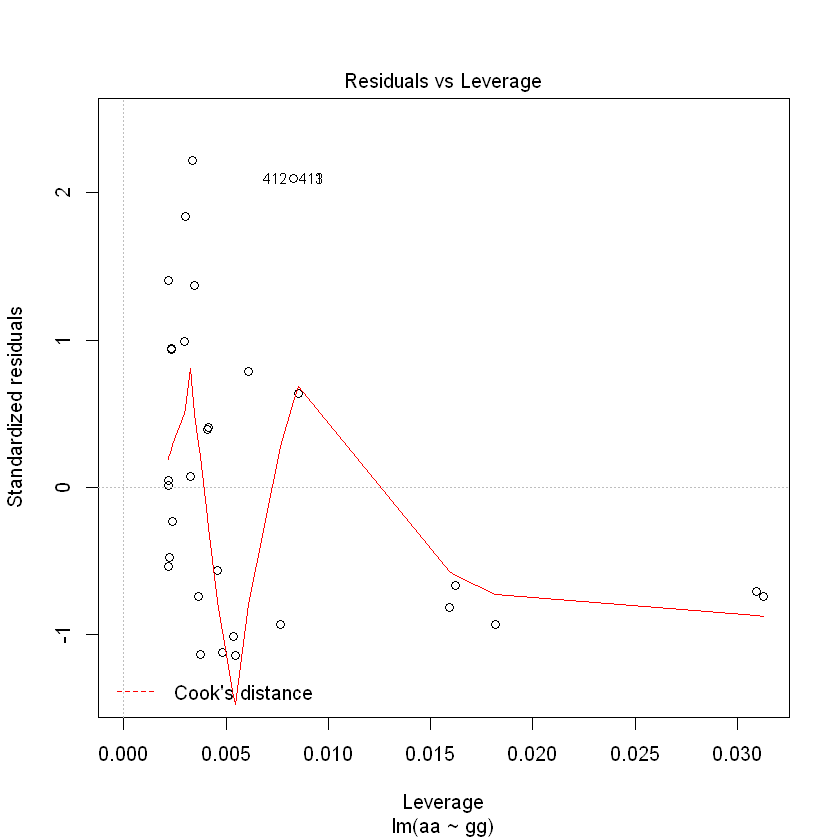

In [7]:
lmaa.gg<-lm(aa~gg)
summary(lmaa.gg)
plot(lmaa.gg)

Now let’s plot genetic distance vs ecological distance.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


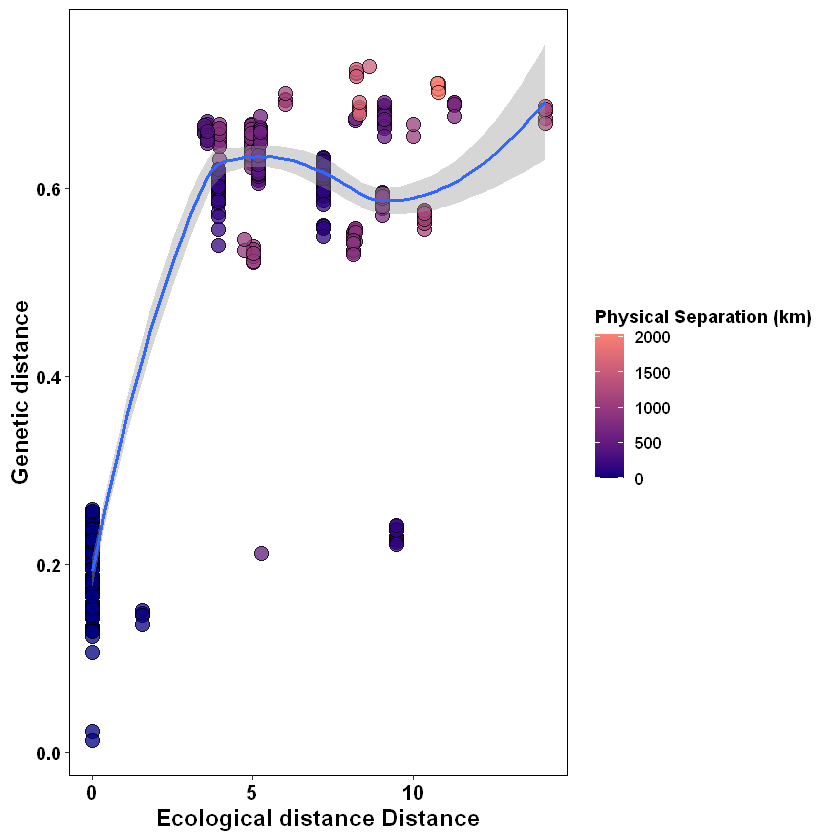

In [8]:
mm = ggplot(mat, aes(y = tt, x = aa)) + 
    geom_point(size = 4, alpha = 0.75, colour = "black",shape = 21, aes(fill = gg/1000)) + 
    #geom_smooth(method = "lm", colour = "red", alpha = 0.5) + 
    stat_smooth() +
    #stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~~~"))) +
    labs(x = "Ecological distance Distance", y = "Genetic distance", fill = "Physical Separation (km)") + 
    theme( axis.text.x = element_text(face = "bold",colour = "black", size = 12), 
           axis.text.y = element_text(face = "bold", size = 11, colour = "black"), 
           axis.title= element_text(face = "bold", size = 14, colour = "black"), 
           panel.background = element_blank(), 
           panel.border = element_rect(fill = NA, colour = "black"),
           legend.position = "right",
           legend.text = element_text(size = 10, face = "bold"),
           legend.title = element_text(size = 11, face = "bold")) +
    scale_fill_continuous(high = "salmon", low = "navy")
    
mm

The data doesn’t look normally distributed with a large gap in genetic distances. This is because we are comparing intra-population (bottom left of the graph) level with inter-population level (top of graph) at the same time.

Let’s see with Genetic distance vs geographical distance.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


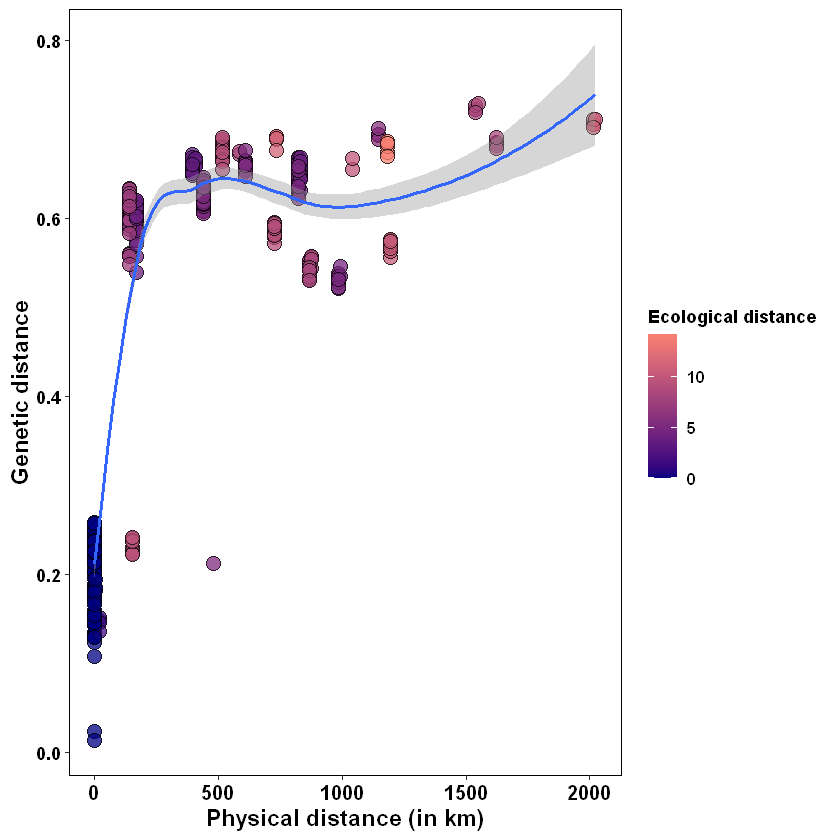

In [9]:
#genetic vs geographic distance
mm = ggplot(mat, aes(y = tt, x = gg/1000)) + 
    geom_point(size = 4, alpha = 0.75, colour = "black",shape = 21, aes(fill = aa)) + 
    #geom_smooth(method = "lm", colour = "red", alpha = 0.5) + 
    stat_smooth() +
    #stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~~~"))) +
    labs(x = "Physical distance (in km)", y = "Genetic distance", fill = "Ecological distance") + 
    theme( axis.text.x = element_text(face = "bold",colour = "black", size = 12), 
           axis.text.y = element_text(face = "bold", size = 11, colour = "black"), 
           axis.title= element_text(face = "bold", size = 14, colour = "black"), 
           panel.background = element_blank(), 
           panel.border = element_rect(fill = NA, colour = "black"),
           legend.position = "right",
           legend.text = element_text(size = 10, face = "bold"),
           legend.title = element_text(size = 11, face = "bold")) +
    scale_fill_continuous(high = "salmon", low = "navy")
    
mm

Very similar patterns. Here we find that genetic distance follow a non-linear relationship with both ecological and geographical distance, with strong increase in genetic distance with the first few km but then flattens out. The linear model is actually a poor fit for this relationship.

Let’s check the distribution of each variable.

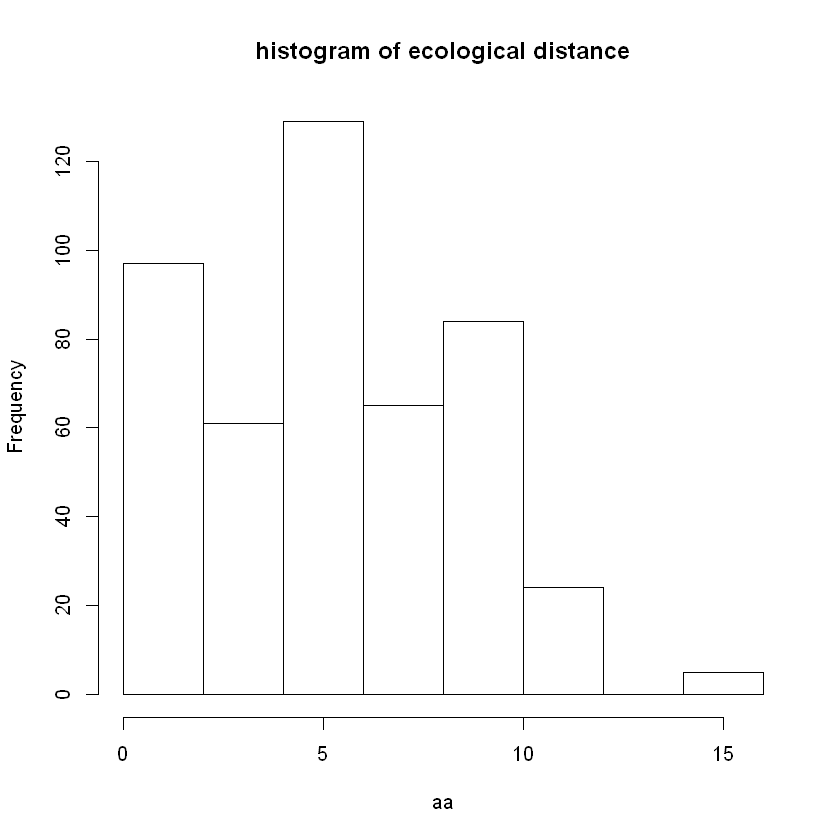

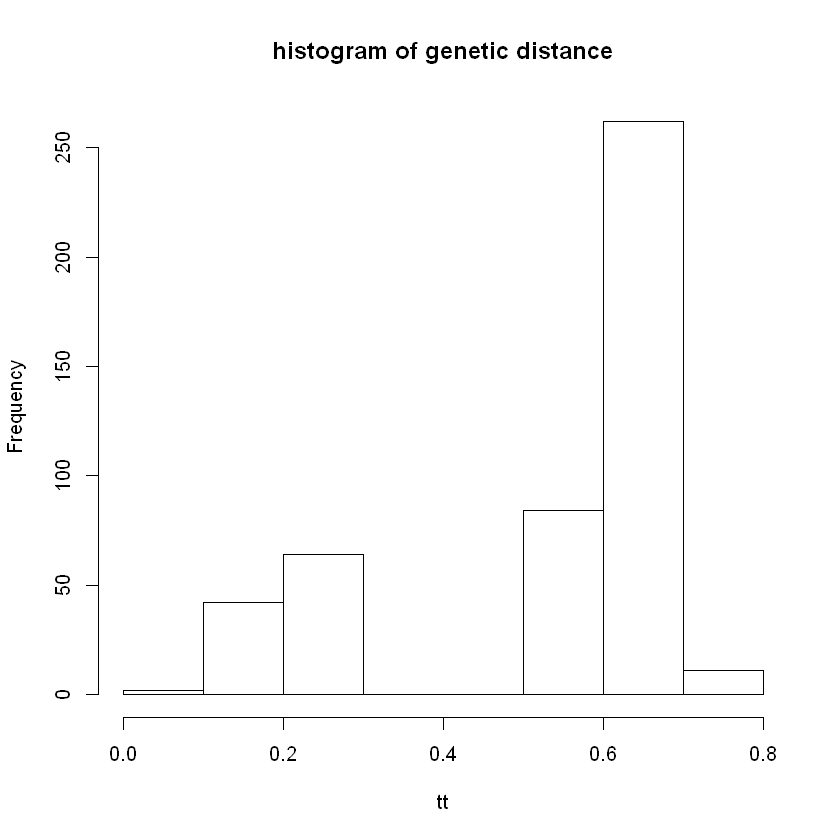

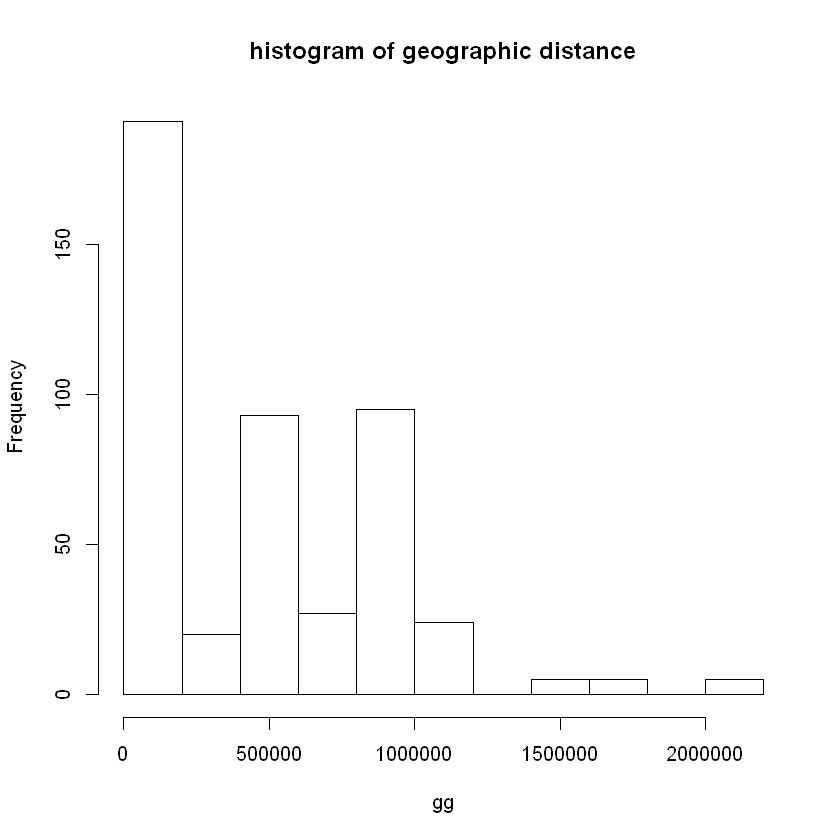

In [10]:
hist(aa, main="histogram of ecological distance")
hist(tt, main="histogram of genetic distance")
hist(gg, main="histogram of geographic distance")

Next we will remove all 0 values in geographic and ecological distance matrices (Ie. values from the same populations) and remove all genetic distances < 0.3 to remove interpopulation measures and avoid this bimodal distribution.

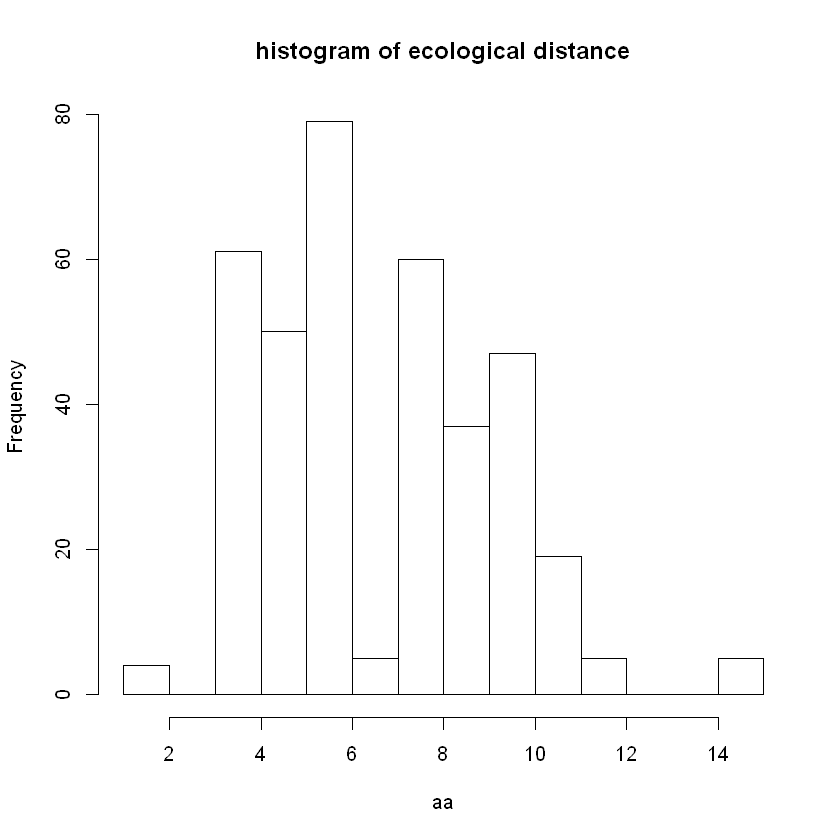

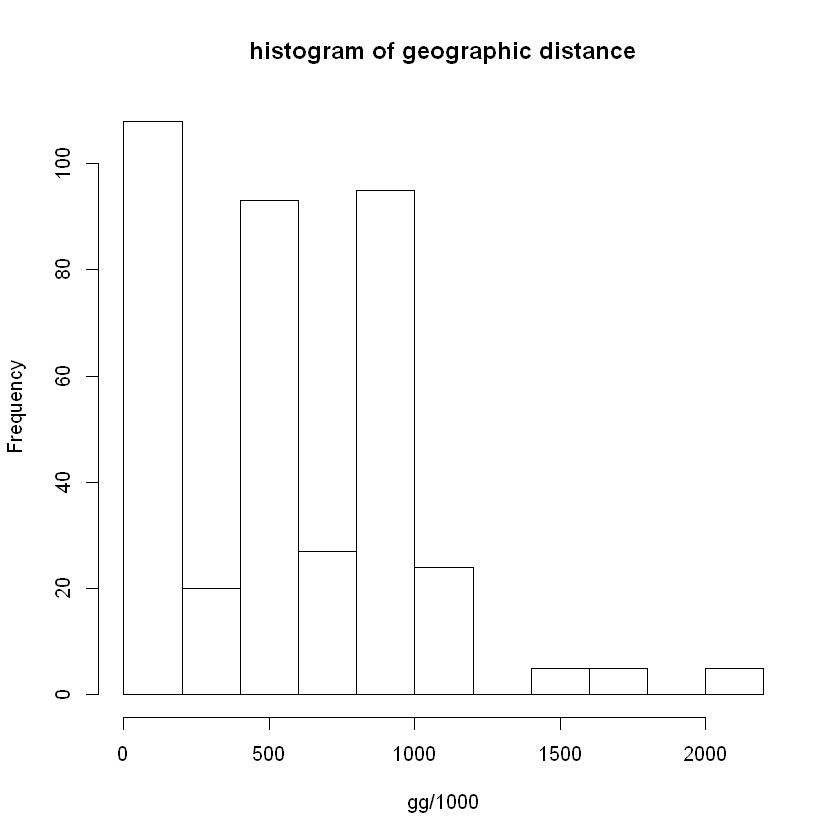

In [11]:
aa = as.vector(eco.dist)
tt = as.vector(gen.dist)
gg = as.vector(geo.dist)

# to look at interpopulation variation, we will take out all 0 values in the ecological and geographic distance matrices

aa[aa==0]<-NA
tt[tt<0.3]<-NA  # here 0.3 is an arbitrary value given the bimodal distribution. 
                # It represents the cutoff point between variation within clusters and between clusters.
gg[gg==0]<-NA

#new data frame with vectorized distance matrices
mat = data.frame(aa,tt,gg)
hist(aa, main="histogram of ecological distance")
hist(gg/1000, main="histogram of geographic distance")

Lets look at what we have now, between genetic clusters. We plot genetic distance vs ecological distance.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 108 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 108 rows containing missing values (geom_point)."

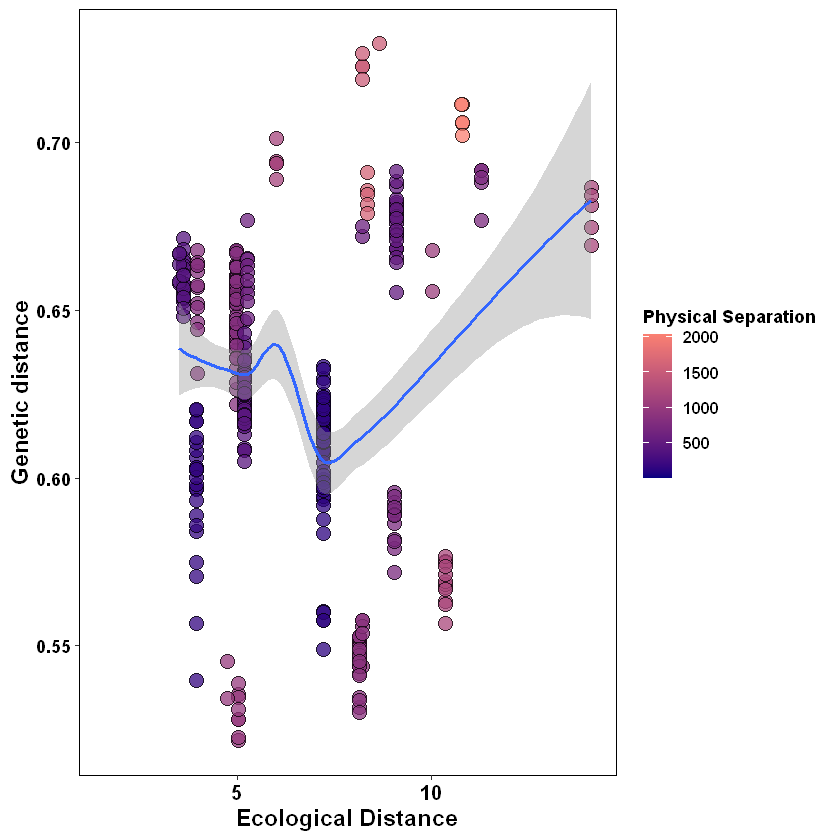

In [12]:
mm = ggplot(mat, aes(y = tt, x = aa)) + 
    geom_point(size = 4, alpha = 0.75, colour = "black",shape = 21, aes(fill = gg/1000)) + 
    stat_smooth() + ## loess in blue
    labs(x = "Ecological Distance", y = "Genetic distance", fill = "Physical Separation") + 
    theme( axis.text.x = element_text(face = "bold",colour = "black", size = 12), 
           axis.text.y = element_text(face = "bold", size = 11, colour = "black"), 
           axis.title= element_text(face = "bold", size = 14, colour = "black"), 
           panel.background = element_blank(), 
           panel.border = element_rect(fill = NA, colour = "black"),
           legend.position = "right",
           legend.text = element_text(size = 10, face = "bold"),
           legend.title = element_text(size = 11, face = "bold")) +
    scale_fill_continuous(high = "salmon", low = "navy")
    
mm

This looks pretty random with no obvious pattern. But wait, what happens it we flip this the other way round?

Warning message:
"Removed 108 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 108 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 108 rows containing missing values (geom_point)."

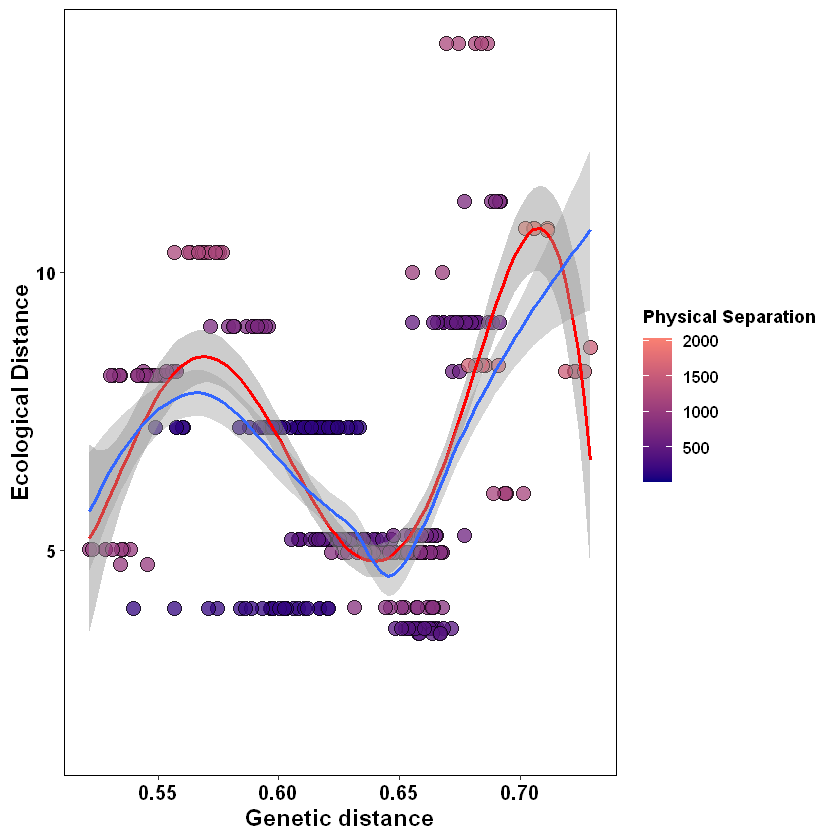

In [13]:
# Fit polynomial regression line and add labels
formula <- y ~ poly(x, 5, raw = TRUE)
mm = ggplot(mat, aes(y = aa, x = tt)) + 
    geom_point(size = 4, alpha = 0.75, colour = "black",shape = 21, aes(fill = gg/1000)) + 
    geom_smooth(method = "lm", formula = formula, colour = "red", alpha = 0.5) + 
    stat_smooth() +
    #stat_cor(aes(label =  paste(..rr.label.., ..p.label.., sep = "~~~~"))) +
    labs(x = "Genetic distance", y = "Ecological Distance", fill = "Physical Separation") + 
    theme( axis.text.x = element_text(face = "bold",colour = "black", size = 12), 
           axis.text.y = element_text(face = "bold", size = 11, colour = "black"), 
           axis.title= element_text(face = "bold", size = 14, colour = "black"), 
           panel.background = element_blank(), 
           panel.border = element_rect(fill = NA, colour = "black"),
           legend.position = "right",
           legend.text = element_text(size = 10, face = "bold"),
           legend.title = element_text(size = 11, face = "bold")) +
    scale_fill_continuous(high = "salmon", low = "navy")
    
mm

The pattern is much more complex, and a linear relationship does not fit this model. Rather a quintic polynomial seems to fit better.

Let’s try the same thing between genetic and geographic distances.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 108 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 108 rows containing missing values (geom_point)."

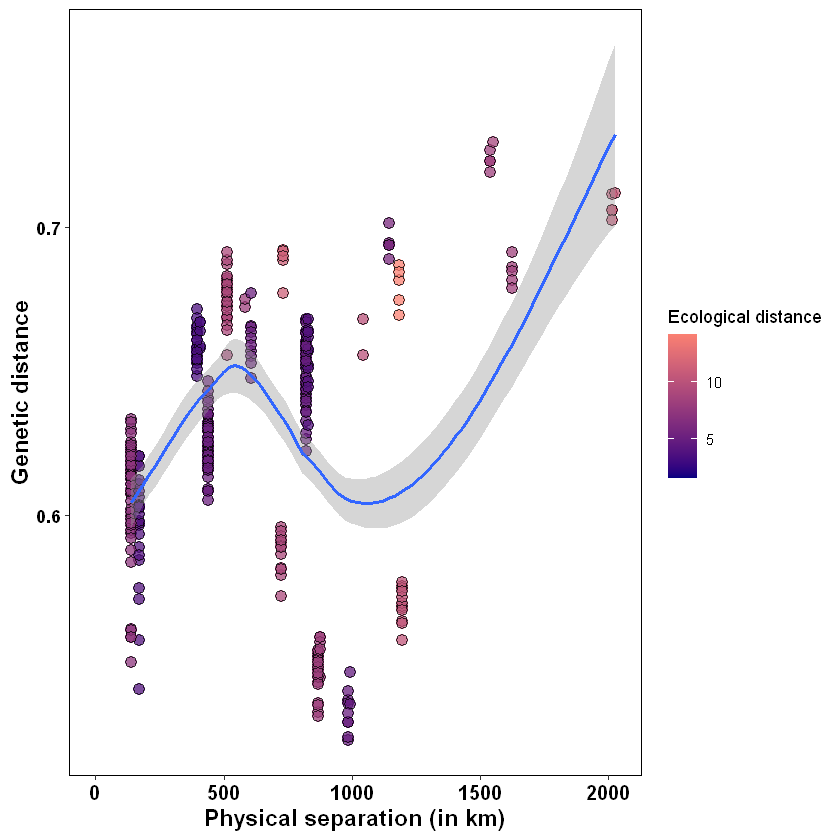

In [14]:
#genetic vs geographic distance
mm = ggplot(mat, aes(y = tt, x = gg/1000)) + 
    geom_point(size = 3, alpha = 0.75, colour = "black",shape = 21, aes(fill = aa)) + 
    #geom_smooth(method = "lm", formula = formula, colour = "red", alpha = 0.4) +
    stat_smooth() +
    #stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~~~"))) +
    labs(x = "Physical separation (in km)", y = "Genetic distance", fill = "Ecological distance") + 
    theme( axis.text.x = element_text(face = "bold",colour = "black", size = 12), 
        axis.text.y = element_text(face = "bold", size = 11, colour = "black"), 
        axis.title= element_text(face = "bold", size = 14, colour = "black"), 
        panel.background = element_blank(), 
        panel.border = element_rect(fill = NA, colour = "black")) +
    scale_fill_continuous(high = "salmon", low = "navy")
mm

Flip it round.

Warning message:
"Removed 108 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 108 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 108 rows containing missing values (geom_point)."

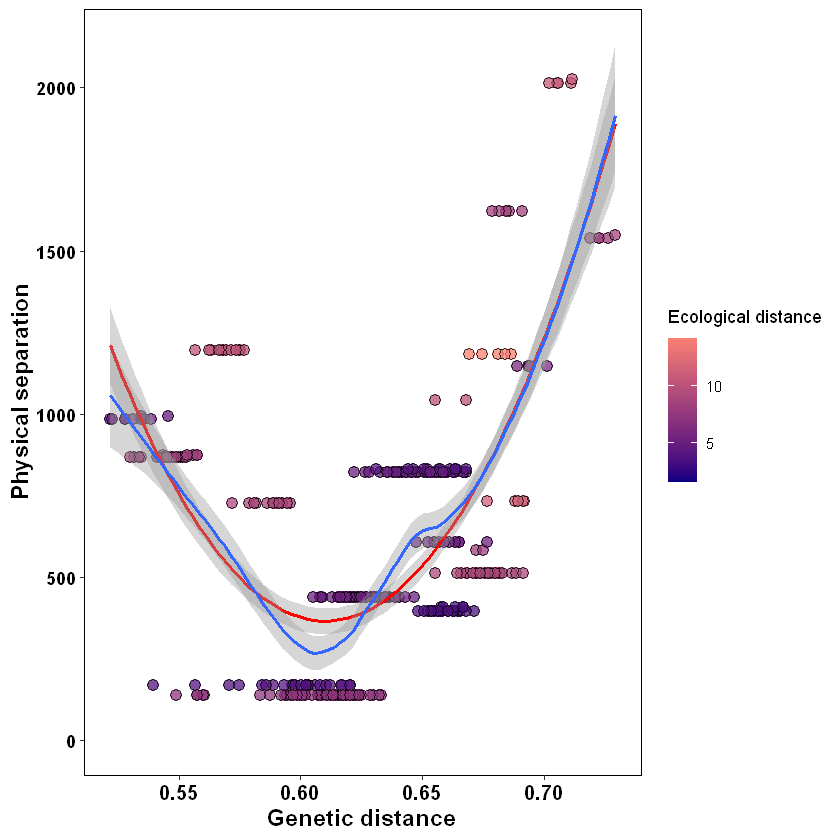

In [15]:
#genetic vs geographic distance
formula <- y ~ poly(x, 2, raw = TRUE)
mm = ggplot(mat, aes(y = gg/1000, x = tt)) + 
    geom_point(size = 3, alpha = 0.75, colour = "black",shape = 21, aes(fill = aa)) + 
    geom_smooth(method = "lm", formula = formula, colour = "red", alpha = 0.4) +
    stat_smooth() +
    #stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~~~"))) +
    labs(x = "Genetic distance", y = "Physical separation", fill = "Ecological distance") + 
    theme( axis.text.x = element_text(face = "bold",colour = "black", size = 12), 
        axis.text.y = element_text(face = "bold", size = 11, colour = "black"), 
        axis.title= element_text(face = "bold", size = 14, colour = "black"), 
        panel.background = element_blank(), 
        panel.border = element_rect(fill = NA, colour = "black")) +
    scale_fill_continuous(high = "salmon", low = "navy")
mm

Now we try a few models to check what might be the best fit for our data.

First, between ecological and genetic distance

In [16]:
# Between ecological and genetic distance
test <- lm(aa~tt)
test2 <- lm(aa~poly(tt, 2, raw = T))
test3 <- lm(aa~poly(tt, 3, raw = T))
test4 <- lm(aa~poly(tt, 4, raw = T))
test5 <- lm(aa~poly(tt, 5, raw = T))
test6 <- lm(aa~poly(tt, 6, raw = T))
compareLM(test, test2,test3,test4,test5,test6)

$Models
  Formula                    
1 "aa ~ tt"                  
2 "aa ~ poly(tt, 2, raw = T)"
3 "aa ~ poly(tt, 3, raw = T)"
4 "aa ~ poly(tt, 4, raw = T)"
5 "aa ~ poly(tt, 5, raw = T)"
6 "aa ~ poly(tt, 6, raw = T)"

$Fit.criteria
  Rank Df.res  AIC AICc  BIC R.squared  Adj.R.sq   p.value Shapiro.W Shapiro.p
1    2    355 1595 1595 1607 7.540e-07 -0.002816 9.870e-01    0.9046 3.347e-14
2    3    354 1538 1538 1554 1.518e-01  0.147000 2.191e-13    0.9614 4.392e-08
3    4    353 1508 1508 1527 2.249e-01  0.218300 2.130e-19    0.9562 7.879e-09
4    5    352 1445 1446 1469 3.532e-01  0.345900 3.092e-32    0.9693 7.464e-07
5    6    351 1421 1421 1448 3.996e-01  0.391100 5.853e-37    0.9674 3.661e-07
6    7    350 1422 1423 1453 4.002e-01  0.389900 3.583e-36    0.9674 3.664e-07

In [17]:
anova(test,test2,test3,test4,test5,test6)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
355,1790.950,NA,NA,NA,NA
354,1519.016,1,271.934103,88.6030580,6.630260e-19
353,1388.164,1,130.851922,42.6348896,2.322525e-10
352,1158.301,1,229.863796,74.8954804,1.834258e-16
351,1075.225,1,83.075437,27.0680937,3.352082e-07
350,1074.195,1,1.030432,0.3357409,5.626708e-01


In [18]:
summary(test5)


Call:
lm(formula = aa ~ poly(tt, 5, raw = T))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5615 -0.9261  0.0576  1.0799  7.4578 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             103420      23463   4.408 1.39e-05 ***
poly(tt, 5, raw = T)1  -869516     189857  -4.580 6.47e-06 ***
poly(tt, 5, raw = T)2  2909736     612964   4.747 3.01e-06 ***
poly(tt, 5, raw = T)3 -4844106     986990  -4.908 1.41e-06 ***
poly(tt, 5, raw = T)4  4012027     792610   5.062 6.72e-07 ***
poly(tt, 5, raw = T)5 -1322535     253961  -5.208 3.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.75 on 351 degrees of freedom
  (108 observations deleted due to missingness)
Multiple R-squared:  0.3996,	Adjusted R-squared:  0.3911 
F-statistic: 46.73 on 5 and 351 DF,  p-value: < 2.2e-16


Then between geographic and genetic distance.

In [19]:
#between geographic and genetic distance 
test <- lm(gg~tt)
test2 <- lm(gg~poly(tt, 2, raw = T))
test3 <- lm(gg~poly(tt, 3, raw = T))
test4 <- lm(gg~poly(tt, 4, raw = T))
test5 <- lm(gg~poly(tt, 5, raw = T))
test6 <- lm(gg~poly(tt, 6, raw = T))
compareLM(test, test2,test3,test4,test5,test6)

$Models
  Formula                    
1 "gg ~ tt"                  
2 "gg ~ poly(tt, 2, raw = T)"
3 "gg ~ poly(tt, 3, raw = T)"
4 "gg ~ poly(tt, 4, raw = T)"
5 "gg ~ poly(tt, 5, raw = T)"
6 "gg ~ poly(tt, 6, raw = T)"

$Fit.criteria
  Rank Df.res   AIC  AICc   BIC R.squared Adj.R.sq   p.value Shapiro.W
1    2    355 10190 10190 10210   0.04194  0.03924 9.731e-05    0.9118
2    3    354  9979  9979  9994   0.47870  0.47570 8.506e-51    0.9588
3    4    353  9981  9981 10000   0.47890  0.47450 1.119e-49    0.9600
4    5    352  9976  9976  9999   0.48880  0.48300 4.523e-50    0.9763
5    6    351  9974  9974 10000   0.49460  0.48740 5.945e-50    0.9762
6    7    350  9975  9975 10010   0.49620  0.48750 3.079e-49    0.9745
  Shapiro.p
1 1.347e-13
2 1.801e-08
3 2.704e-08
4 1.321e-05
5 1.295e-05
6 6.154e-06

In [20]:
anova(test,test2,test3,test4,test5,test6)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
355,5.176584e+13,NA,NA,NA,NA
354,2.816872e+13,1,2.359712e+13,303.3844570,2.249777e-49
353,2.815383e+13,1,1.488812e+10,0.1914142,6.620120e-01
352,2.762247e+13,1,5.313635e+11,6.8316561,9.342278e-03
351,2.730540e+13,1,3.170661e+11,4.0764677,4.424648e-02
350,2.722286e+13,1,8.254025e+10,1.0612068,3.036514e-01


In [21]:
summary(test2)


Call:
lm(formula = gg ~ poly(tt, 2, raw = T))

Residuals:
    Min      1Q  Median      3Q     Max 
-733505 -229810   25262  189237  752254 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             40360204    2383713   16.93   <2e-16 ***
poly(tt, 2, raw = T)1 -131076551    7723791  -16.97   <2e-16 ***
poly(tt, 2, raw = T)2  107398257    6236625   17.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 282100 on 354 degrees of freedom
  (108 observations deleted due to missingness)
Multiple R-squared:  0.4787,	Adjusted R-squared:  0.4757 
F-statistic: 162.5 on 2 and 354 DF,  p-value: < 2.2e-16


The end.